In [7]:
#Title:
# Sales Data Analysis Project
# Dataset: Amazon Sales Dataset
# Objective: Analyze sales performance and provide business insights


In [8]:
#Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


plt.style.use('default')
plt.rcParams['figure.figsize'] = (10,6)


In [9]:
#Loading Dataset

df = pd.read_csv("/content/sales_dataset.csv", low_memory=False)
df


,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128944,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128945,402-9551604-7544318,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128946,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128947,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [10]:
#Dataset Shape & Info

print("Dataset Shape:", df.shape)

df.info()

Dataset Shape: (128949, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128949 entries, 0 to 128948
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128949 non-null  object 
 1   Date                128949 non-null  object 
 2   Status              128949 non-null  object 
 3   Fulfilment          128949 non-null  object 
 4   Sales Channel       128949 non-null  object 
 5   ship-service-level  128949 non-null  object 
 6   Style               128949 non-null  object 
 7   SKU                 128949 non-null  object 
 8   Category            128949 non-null  object 
 9   Size                128949 non-null  object 
 10  ASIN                128949 non-null  object 
 11  Courier Status      122078 non-null  object 
 12  Qty                 128949 non-null  int64  
 13  currency            121155 non-null  object 
 14  Amount              121155 non-null  float64
 15  ship-c

In [11]:
#Checking Missing Values

df.isnull().sum().sort_values(ascending=False)

,0
fulfilled-by,89679
promotion-ids,49142
Unnamed: 22,49041
currency,7794
Amount,7794
Courier Status,6871
ship-city,33
ship-state,33
ship-postal-code,33
ship-country,33


In [12]:
#Data Cleaning
#Handle Missing Values

df['Amount'].fillna(0, inplace=True)
df['promotion-ids'].fillna('No Promotion', inplace=True)
df['fulfilled-by'].fillna('Unknown', inplace=True)

# ---------- AFTER ----------
print("\nMissing values AFTER cleaning:\n")
print("Amount        :", df['Amount'].isna().sum())
print("Promotion IDs :", df['promotion-ids'].isna().sum())
print("Fulfilled By  :", df['fulfilled-by'].isna().sum())



Missing values AFTER cleaning:

Amount        : 0
Promotion IDs : 0
Fulfilled By  : 0


In [13]:
#Finding Unique Values

categorical_cols = ['Status', 'Fulfilment', 'Category', 'Courier Status', 'currency', 'ship-state', 'ship-country']

print("Current columns in DataFrame:")
print(df.columns.tolist())

for col in categorical_cols:
    print(f"\nUnique values for '{col}':")
    print(df[col].unique())
    print(f"Number of unique values: {df[col].nunique()}")

Current columns in DataFrame:
['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by', 'Unnamed: 22']

Unique values for 'Status':
['Cancelled' 'Shipped - Delivered to Buyer' 'Shipped'
 'Shipped - Returned to Seller' 'Shipped - Rejected by Buyer'
 'Shipped - Lost in Transit' 'Shipped - Out for Delivery'
 'Shipped - Returning to Seller' 'Shipped - Picked Up' 'Pending'
 'Pending - Waiting for Pick Up' 'Shipped - Damaged' 'Shipping']
Number of unique values: 13

Unique values for 'Fulfilment':
['Merchant' 'Amazon']
Number of unique values: 2

Unique values for 'Category':
['Set' 'kurta' 'Western Dress' 'Top' 'Ethnic Dress' 'Bottom' 'Saree'
 'Blouse' 'Dupatta']
Number of unique values: 9

Unique values for 'Courier Status':
[nan 'Shipped' 'Cancelled' 'Unshipped']
Number o

In [14]:
# Replacing NaN values in Courier Status with 'Unknown'
df['Courier Status'].fillna('Unknown', inplace=True)

# Replacing NaN values in currency with 'INR'
df['currency'].fillna('INR', inplace=True)

# Replacing NaN values in ship-state with 'Unknown'
df['ship-state'].fillna('Unknown', inplace=True)

# Replacing NaN values in ship-country with 'IN'
df['ship-country'].fillna('IN', inplace=True)

# ---------- AFTER ----------
print("\nNaN count AFTER filling:\n")
print("Courier Status :", df['Courier Status'].isna().sum())
print("Currency       :", df['currency'].isna().sum())
print("Ship State     :", df['ship-state'].isna().sum())
print("Ship Country   :", df['ship-country'].isna().sum())



NaN count AFTER filling:

Courier Status : 0
Currency       : 0
Ship State     : 0
Ship Country   : 0


In [15]:
# Normalize ship-state text
df['ship-state'] = (
    df['ship-state']
    .str.strip()
    .str.lower()
)

# State name mapping
state_mapping = {
    'maharashtra': 'Maharashtra',
    'karnataka': 'Karnataka',

    'puducherry': 'Puducherry',
    'pondicherry': 'Puducherry',

    'tamil nadu': 'Tamil Nadu',
    'uttar pradesh': 'Uttar Pradesh',

    'delhi': 'Delhi',
    'new delhi': 'Delhi',

    'chandigarh': 'Chandigarh',
    'telangana': 'Telangana',

    'andhra pradesh': 'Andhra Pradesh',
    'apo': 'Andhra Pradesh',

    'odisha': 'Odisha',
    'orissa': 'Odisha',

    'rajasthan': 'Rajasthan',
    'rajsthan': 'Rajasthan',
    'rajshthan': 'Rajasthan',

    'punjab': 'Punjab',
    'punjab/mohali/zirakpur': 'Punjab',

    'goa': 'Goa',
    'gujarat': 'Gujarat',
    'bihar': 'Bihar',

    'arunachal pradesh': 'Arunachal Pradesh',
    'madhya pradesh': 'Madhya Pradesh',
    'west bengal': 'West Bengal',
    'kerala': 'Kerala',
    'haryana': 'Haryana',
    'himachal pradesh': 'Himachal Pradesh',
    'uttarakhand': 'Uttarakhand',

    'assam': 'Assam',
    'jharkhand': 'Jharkhand',
    'chhattisgarh': 'Chhattisgarh',
    'jammu & kashmir': 'Jammu & Kashmir',

    'manipur': 'Manipur',
    'mizoram': 'Mizoram',
    'nagaland': 'Nagaland',
    'meghalaya': 'Meghalaya',
    'sikkim': 'Sikkim',
    'tripura': 'Tripura',

    'ladakh': 'Ladakh',
    'lakshadweep': 'Lakshadweep',
    'andaman & nicobar': 'Andaman & Nicobar',
    'dadra and nagar haveli': 'Dadra and Nagar Haveli',

    'unknown': 'Unknown',
    'nl': 'Unknown'
}

# Apply mapping
df['ship-state'] = df['ship-state'].replace(state_mapping)
# ---------- AFTER CLEANING ----------
print("\nUnique ship-state values AFTER cleaning:")
print(df['ship-state'].unique())
print("Number of unique states (after):", df['ship-state'].nunique())




Unique ship-state values AFTER cleaning:
['Maharashtra' 'Karnataka' 'Puducherry' 'Tamil Nadu' 'Uttar Pradesh'
 'Chandigarh' 'Telangana' 'Assam' 'Jharkhand' 'Chhattisgarh'
 'Andhra Pradesh' 'Odisha' 'Delhi' 'Kerala' 'Madhya Pradesh' 'West Bengal'
 'Nagaland' 'Rajasthan' 'Gujarat' 'Uttarakhand' 'Bihar' 'Jammu & Kashmir'
 'Haryana' 'Punjab' 'Himachal Pradesh' 'Arunachal Pradesh' 'Manipur' 'Goa'
 'Meghalaya' 'Tripura' 'Ladakh' 'dadra and nagar' 'Sikkim' 'Unknown'
 'Andaman & Nicobar' 'Mizoram' 'rj' 'Lakshadweep' 'pb' 'ar']
Number of unique states (after): 40


In [16]:
# Verify missing values after replacement
df.isnull().sum().sort_values(ascending=False)

,0
Unnamed: 22,49041
ship-city,33
ship-postal-code,33
Fulfilment,0
Order ID,0
Date,0
Status,0
Style,0
ship-service-level,0
Sales Channel,0


In [17]:
removed_cols = [col for col in df.columns if 'Unnamed' in col]
print("Removed columns:", removed_cols)



Removed columns: ['Unnamed: 22']


In [18]:
#Date Formatting & Feature Engineering

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
# ---------- AFTER ----------
print("\nDate column AFTER conversion:")
print(df['Date'].head())
print("Data type AFTER:", df['Date'].dtype)

print("\nMonth & Year columns (sample):")
print(df[['Date', 'Month', 'Year']].head())



Date column AFTER conversion:
0   2022-04-30
1   2022-04-30
2   2022-04-30
3   2022-04-30
4   2022-04-30
Name: Date, dtype: datetime64[ns]
Data type AFTER: datetime64[ns]

Month & Year columns (sample):
        Date  Month  Year
0 2022-04-30      4  2022
1 2022-04-30      4  2022
2 2022-04-30      4  2022
3 2022-04-30      4  2022
4 2022-04-30      4  2022


In [19]:
#Basic Statistical Summary

df.describe()

,Date,Qty,Amount,ship-postal-code,Month,Year
count,128949,128949.000000,128949.000000,128916.000000,128949.000000,128949.0
mean,2022-05-12 11:46:37.636274176,0.904629,609.350774,463978.298008,4.909150,2022.0
min,2022-03-31 00:00:00,0.000000,0.000000,110001.000000,3.000000,2022.0
25%,2022-04-20 00:00:00,1.000000,413.000000,382421.000000,4.000000,2022.0
50%,2022-05-10 00:00:00,1.000000,583.000000,500033.000000,5.000000,2022.0
75%,2022-06-04 00:00:00,1.000000,771.000000,600024.000000,6.000000,2022.0
max,2022-06-29 00:00:00,15.000000,5584.000000,989898.000000,6.000000,2022.0
std,NaN,0.314782,313.353546,191473.322953,0.818381,0.0


In [20]:
#Total Sales Calculation

total_sales = df['Amount'].sum()
print(f"Total Sales: ₹{total_sales:,.2f}")


Total Sales: ₹78,575,172.94


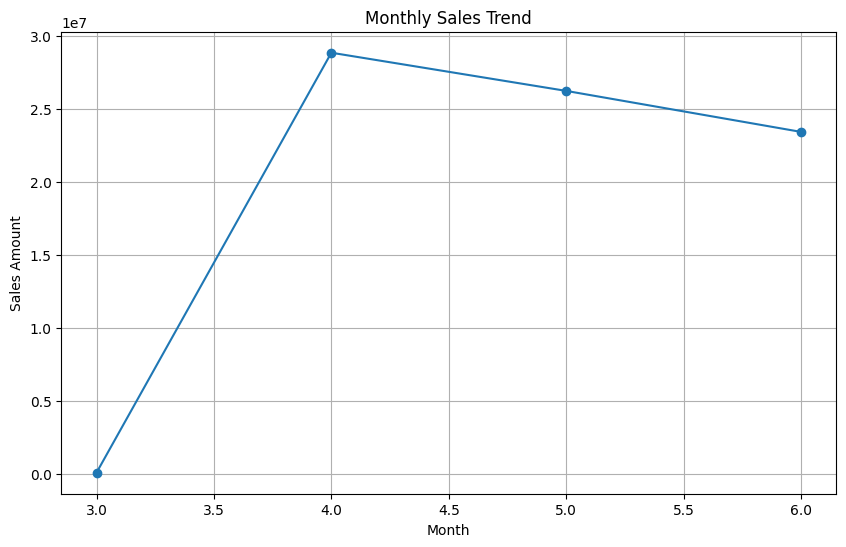

In [21]:
#Monthly Sales Trend

monthly_sales = df.groupby('Month')['Amount'].sum()

plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales Amount")
plt.grid(True)
plt.show()

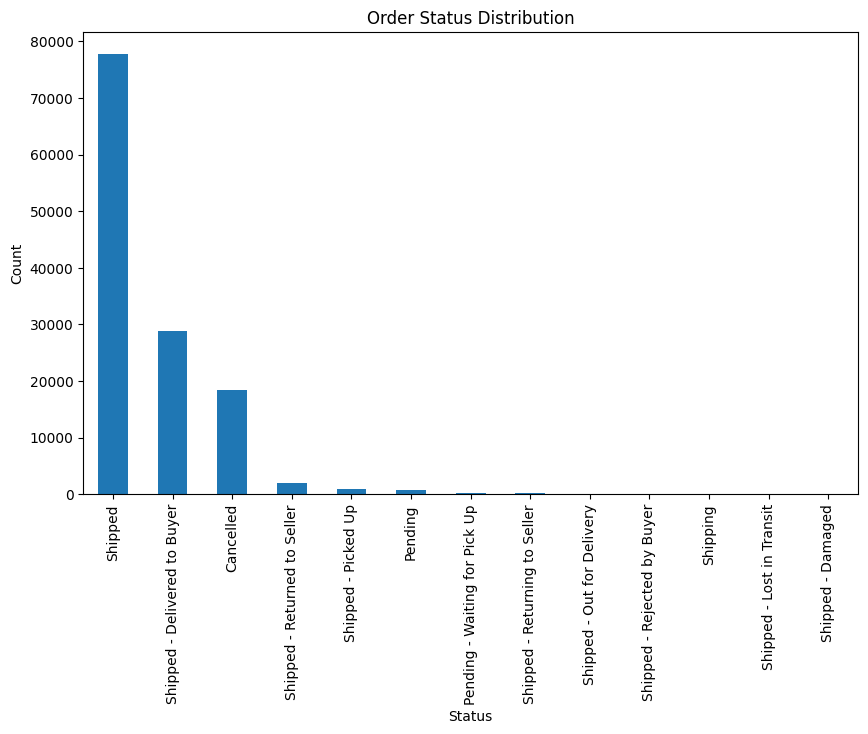

In [22]:
#Order Status Analysis

status_counts = df['Status'].value_counts()
status_counts

status_counts.plot(kind='bar')
plt.title("Order Status Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

In [23]:
#Category-wise Sales

category_sales = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
category_sales.head(10)

,Amount
Category,
Set,39196086.67
kurta,21295132.70
Western Dress,11212423.69
Top,5347242.30
Ethnic Dress,790362.66
Blouse,458408.18
Bottom,150667.98
Saree,123933.76
Dupatta,915.00


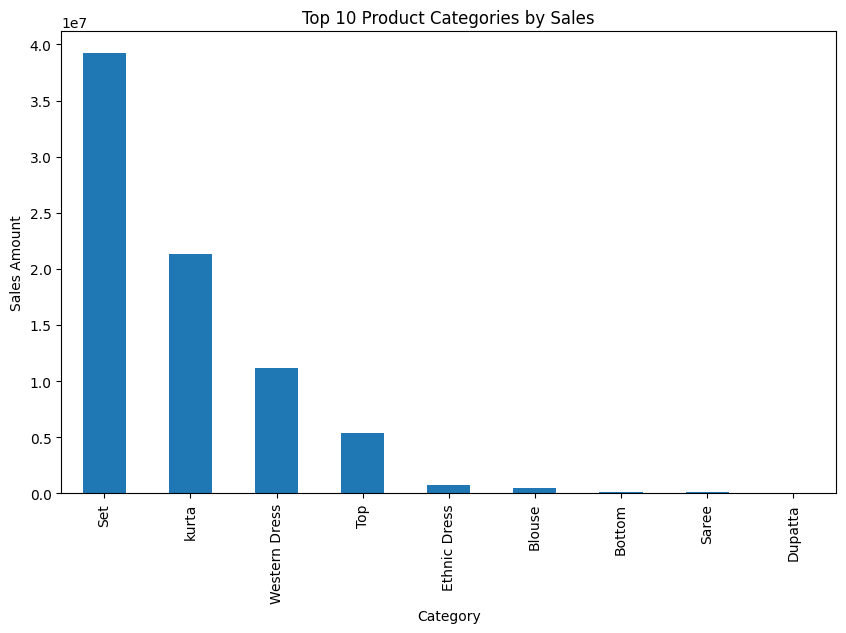

In [24]:
category_sales.head(10).plot(kind='bar')
plt.title("Top 10 Product Categories by Sales")
plt.xlabel("Category")
plt.ylabel("Sales Amount")
plt.show()

In [25]:
#State-wise Sales Performance

state_sales = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)
state_sales.head(10)

,Amount
ship-state,
Maharashtra,13333256.14
Karnataka,10477935.37
Telangana,6915325.65
Uttar Pradesh,6814412.08
Tamil Nadu,6513926.11
Delhi,4392150.41
Kerala,3830227.58
West Bengal,3507025.44
Andhra Pradesh,3219287.72


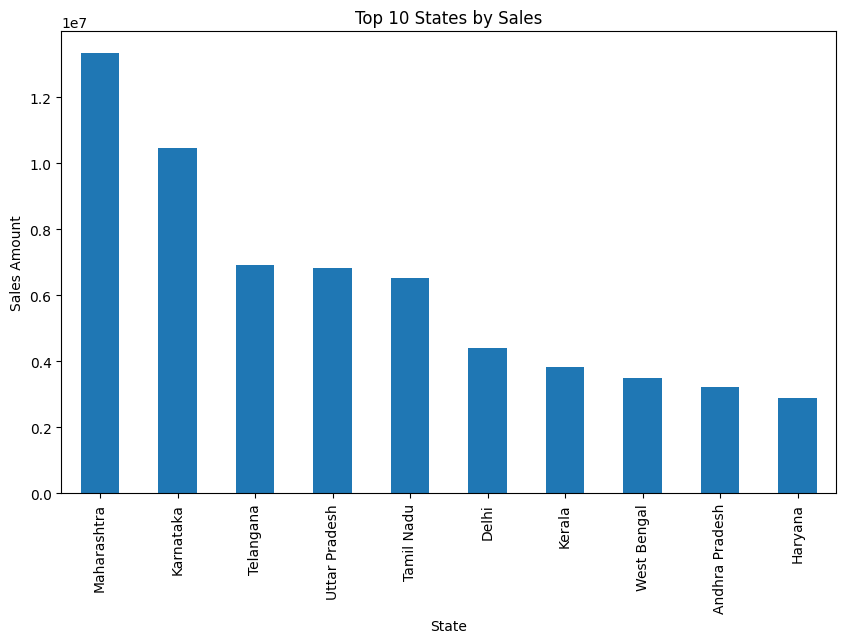

In [26]:
state_sales.head(10).plot(kind='bar')
plt.title("Top 10 States by Sales")
plt.xlabel("State")
plt.ylabel("Sales Amount")
plt.show()

In [27]:
#Fulfilment Method Analysis

df['Fulfilment'].value_counts()

,count
Fulfilment,
Amazon,89679
Merchant,39270


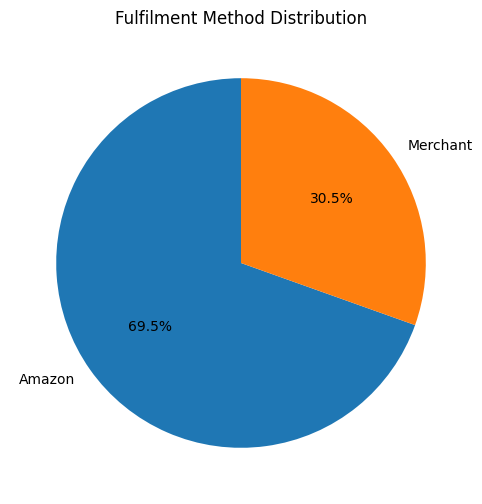

In [28]:
df['Fulfilment'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', startangle=90
)
plt.title("Fulfilment Method Distribution")
plt.ylabel("")
plt.show()

In [29]:
#Sales Channel Analysis

df['Sales Channel '].value_counts()

,count
Sales Channel,
Amazon.in,128825
Non-Amazon,124


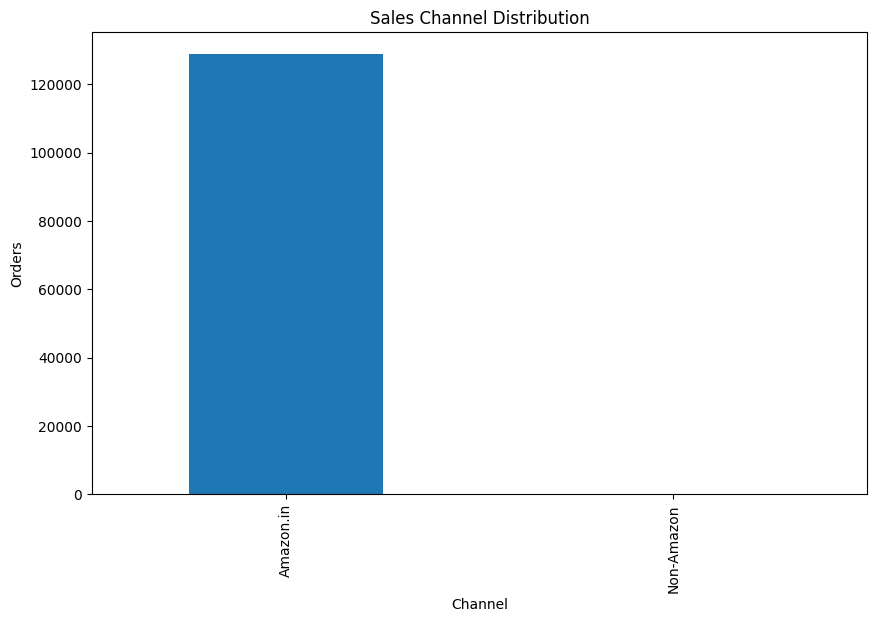

In [30]:
df['Sales Channel '].value_counts().plot(kind='bar')
plt.title("Sales Channel Distribution")
plt.xlabel("Channel")
plt.ylabel("Orders")
plt.show()

In [31]:
#B2B vs B2C Orders

df['B2B'].value_counts()

,count
B2B,
False,128078
True,871


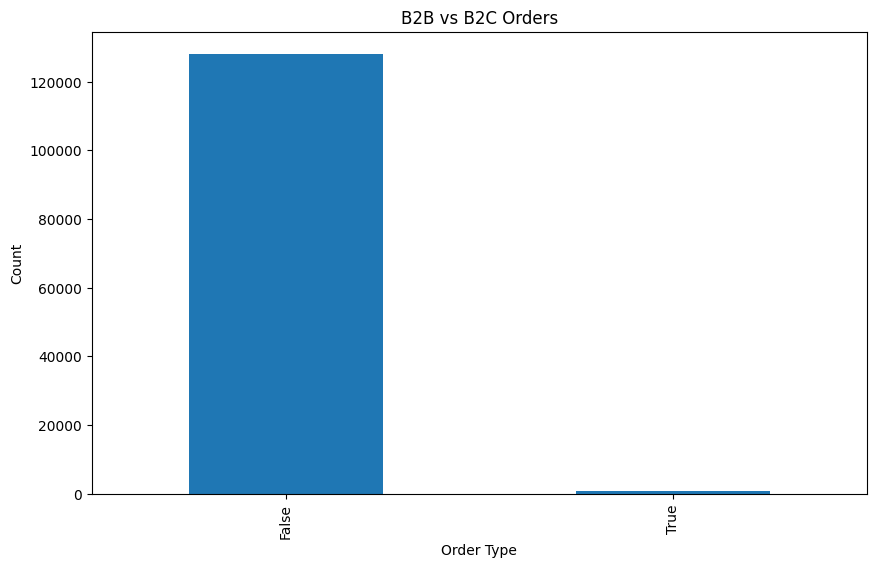

In [32]:
df['B2B'].value_counts().plot(kind='bar')
plt.title("B2B vs B2C Orders")
plt.xlabel("Order Type")
plt.ylabel("Count")
plt.show()

In [33]:
#Promotion Impact Analysis

promo_sales = df.groupby('promotion-ids')['Amount'].sum().sort_values(ascending=False)
promo_sales.head(10)

,Amount
promotion-ids,
IN Core Free Shipping 2015/04/08 23-48-5-108,31809427.00
No Promotion,24996550.94
"Amazon PLCC Free-Financing Universal Merchant AAT-WNKTBO3K27EJC,Amazon PLCC Free-Financing Universal Merchant AAT-QX3UCCJESKPA2,Amazon PLCC Free-Financing Universal Merchant AAT-CXJHMC2YJUK76,Amazon PLCC Free-Financing Universal Merchant AAT-CC4FAVTYR4X7C,Amazon PLCC Free-Financing Universal Merchant AAT-XXRCW6NZEPZI4,Amazon PLCC Free-Financing Universal Merchant AAT-EOKPWFWYW7Y6I,Amazon PLCC Free-Financing Universal Merchant AAT-ZYL5UPUNW6T62,Amazon PLCC Free-Financing Universal Merchant AAT-G5ZRX4BZOIODU,Amazon PLCC Free-Financing Universal Merchant AAT-PZHUW6DZX4BPS,Amazon PLCC Free-Financing Universal Merchant AAT-XX7G3ZRJJJ5LG,Amazon PLCC Free-Financing Universal Merchant AAT-LEHCKNDBJG64E,Amazon PLCC Free-Financing Universal Merchant AAT-DJVHCEV7D7RQY,Amazon PLCC Free-Financing Universal Merchant AAT-BRSZZ45H6MHAO,Amazon PLCC Free-Financing Universal Merchant AAT-MKLXOOZWQL7GO,Amazon PLCC Free-Financing Universal Merchant AAT-CB7UNXEXGIJTC,Amazon PLCC Free-Financing Universal Merchant #MP-gzasho-1593152694811,Amazon PLCC Free-Financing Universal Merchant AAT-WLBA4GZ52EAH4",303792.00
"Amazon PLCC Free-Financing Universal Merchant AAT-WNKTBO3K27EJC,Amazon PLCC Free-Financing Universal Merchant AAT-QX3UCCJESKPA2,Amazon PLCC Free-Financing Universal Merchant AAT-CXJHMC2YJUK76,Amazon PLCC Free-Financing Universal Merchant AAT-CC4FAVTYR4X7C,Amazon PLCC Free-Financing Universal Merchant AAT-XXRCW6NZEPZI4,Amazon PLCC Free-Financing Universal Merchant AAT-EOKPWFWYW7Y6I,Amazon PLCC Free-Financing Universal Merchant AAT-ZYL5UPUNW6T62,Amazon PLCC Free-Financing Universal Merchant AAT-G5ZRX4BZOIODU,Amazon PLCC Free-Financing Universal Merchant AAT-PZHUW6DZX4BPS,Amazon PLCC Free-Financing Universal Merchant AAT-BRSZZ45H6MHAO,Amazon PLCC Free-Financing Universal Merchant AAT-MKLXOOZWQL7GO,Amazon PLCC Free-Financing Universal Merchant AAT-CB7UNXEXGIJTC,Amazon PLCC Free-Financing Universal Merchant #MP-gzasho-1593152694811,Amazon PLCC Free-Financing Universal Merchant AAT-WLBA4GZ52EAH4",228181.00
"Amazon PLCC Free-Financing Universal Merchant AAT-WNKTBO3K27EJC,Amazon PLCC Free-Financing Universal Merchant AAT-QX3UCCJESKPA2,Amazon PLCC Free-Financing Universal Merchant AAT-5QQ7BIYYQEDN2,Amazon PLCC Free-Financing Universal Merchant AAT-DSJ2QRXXWXVMQ,Amazon PLCC Free-Financing Universal Merchant AAT-CXJHMC2YJUK76,Amazon PLCC Free-Financing Universal Merchant AAT-CC4FAVTYR4X7C,Amazon PLCC Free-Financing Universal Merchant AAT-XXRCW6NZEPZI4,Amazon PLCC Free-Financing Universal Merchant AAT-EOKPWFWYW7Y6I,Amazon PLCC Free-Financing Universal Merchant AAT-ZYL5UPUNW6T62,Amazon PLCC Free-Financing Universal Merchant AAT-G5ZRX4BZOIODU,Amazon PLCC Free-Financing Universal Merchant AAT-PZHUW6DZX4BPS,Amazon PLCC Free-Financing Universal Merchant AAT-ETXQ3XXWMRXBG,Amazon PLCC Free-Financing Universal Merchant AAT-BRSZZ45H6MHAO,Amazon PLCC Free-Financing Universal Merchant AAT-MKLXOOZWQL7GO,Amazon PLCC Free-Financing Universal Merchant AAT-CB7UNXEXGIJTC,Amazon PLCC Free-Financing Universal Merchant #MP-gzasho-1593152694811,Amazon PLCC Free-Financing Universal Merchant AAT-WLBA4GZ52EAH4",218352.00
Duplicated A12RHGVGRWOT3S 1560498941486,192550.00
Duplicated AYTJSBA8ZOP16 1567159860988,172457.00
"Amazon PLCC Free-Financing Universal Merchant AAT-WNKTBO3K27EJC,Amazon PLCC Free-Financing Universal Merchant AAT-QX3UCCJESKPA2,Amazon PLCC Free-Financing Universal Merchant AAT-5QQ7BIYYQEDN2,Amazon PLCC Free-Financing Universal Merchant AAT-DSJ2QRXXWXVMQ,Amazon PLCC Free-Financing Universal Merchant AAT-CXJHMC2YJUK76,Amazon PLCC Free-Financing Universal Merchant AAT-CC4FAVTYR4X7C,Amazon PLCC Free-Financing Universal Merchant AAT-XXRCW6NZEPZI4,Amazon PLCC Free-Financing Universal Merchant AAT-EOKPWFWYW7Y6I,Amazon PLCC Free-Financing Universal Merchant AAT-ZYL5UPUNW6T62,Amazon PLCC Free-Financing Universal Merchant AAT-G5ZRX4BZOIODU,Amazon PLCC Free-Financing

In [34]:
#Full-row duplicates

df.duplicated().sum()

np.int64(6)

In [35]:
#View duplicate rows

df[df.duplicated()]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22,Month,Year
30652,406-0372545-6086735,2022-04-12,Cancelled,Amazon,Amazon.in,Expedited,SET197,SET197-KR-NP-L,Set,L,...,Siliguri,West Bengal,734008.0,IN,No Promotion,False,Unknown,NaN,4,2022
41283,408-0373839-4433120,2022-04-05,Cancelled,Amazon,Amazon.in,Expedited,JNE3501,JNE3501-KR-M,kurta,M,...,BENGALURU,Karnataka,560072.0,IN,No Promotion,False,Unknown,NaN,4,2022
79836,171-9628368-5329958,2022-05-07,Cancelled,Amazon,Amazon.in,Expedited,J0329,J0329-KR-L,kurta,L,...,ERNAKULAM,Kerala,682017.0,IN,No Promotion,False,Unknown,False,5,2022
85782,171-3249942-2207542,2022-05-03,Shipped,Amazon,Amazon.in,Expedited,SET323,SET323-KR-NP-XL,Set,XL,...,PUNE,Maharashtra,411057.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Unknown,False,5,2022
86410,405-8669298-3850736,2022-05-03,Shipped,Amazon,Amazon.in,Expedited,MEN5025,MEN5025-KR-XXXL,kurta,3XL,...,GHAZIABAD,Uttar Pradesh,201010.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Unknown,False,5,2022
98946,407-4853873-4978725,2022-06-22,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-M,Set,M,...,Zirakpur,Punjab,140603.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Unknown,False,6,2022


In [36]:
# Make sure df is a copy
df = df.copy()

# BEFORE
print("Number of rows BEFORE removing duplicates:", df.shape[0])

# Remove exact duplicate rows
df = df.drop_duplicates()

# AFTER
print("Number of rows AFTER removing duplicates:", df.shape[0])

# How many rows were removed
print("Number of duplicate rows removed:",
      df.shape[0] - df.drop_duplicates().shape[0])


Number of rows BEFORE removing duplicates: 128949
Number of rows AFTER removing duplicates: 128943
Number of duplicate rows removed: 0


In [37]:
#After Cleaning: Recheck

# Check remaining duplicate rows
remaining_duplicates = df.duplicated().sum()

print("Number of duplicate rows after cleaning:", remaining_duplicates)


Number of duplicate rows after cleaning: 0


In [42]:
# Make sure df is a copy
df = df.copy()

# Filter cancelled orders
cancelled_sales = df[df['Status'].str.contains('Cancelled', na=False)].copy()

# Revenue calculations
total_revenue = df['Amount'].sum()
cancelled_revenue = cancelled_sales['Amount'].sum()

# Avoid division by zero
if total_revenue == 0:
    cancelled_percentage = 0
else:
    cancelled_percentage = (cancelled_revenue / total_revenue) * 100

# PRINT OUTPUT
print("Total revenue:", total_revenue)
print("Cancelled revenue:", cancelled_revenue)
print("Number of cancelled orders:", cancelled_sales.shape[0])
print(f"Percentage of revenue lost: {cancelled_percentage:.2f}%")


Total revenue: 78572537.94
Cancelled revenue: 6926119.32
Number of cancelled orders: 18338
Percentage of revenue lost: 8.81%


##Key Insights summary

- Kurtas and Sets generate the highest revenue
- Sales peak in certain months indicating seasonality
- Maharashtra, Karnataka, and Tamil Nadu are top-performing states
- High cancellation rate negatively impacts revenue
- Amazon fulfilment dominates logistics
- B2B orders are significantly lower than B2C

Business Recommendations for Improvement

1. Reduce cancellations by improving delivery timelines
2. Focus inventory on high-performing categories
3. Increase marketing in top-performing states
4. Expand B2B sales with bulk discounts
5. Optimize promotions by tracking ROI

In [43]:
#Conclusion

print("Sales Data Analysis Completed Successfully")

Sales Data Analysis Completed Successfully


In [44]:
#cancellation rates

df['Cancelled'] = df['Status'].str.contains('Cancelled', na=False)

cancel_rate = df['Cancelled'].mean() * 100
cancel_rate

np.float64(14.2217879217949)

In [45]:
#Months-wise cancellation rates

monthly_cancel = (
    df
    .groupby(['Year','Month'])['Cancelled']
    .mean()
    .reset_index()
)

monthly_cancel['Cancellation_Rate_%'] = monthly_cancel['Cancelled'] * 100
monthly_cancel

,Year,Month,Cancelled,Cancellation_Rate_%
0,2022,3,0.105263,10.526316
1,2022,4,0.145487,14.548679
2,2022,5,0.139893,13.989341
3,2022,6,0.140723,14.072285


In [46]:
#Highest sales day

df['Day_Name'] = df['Date'].dt.day_name()

day_sales = df.groupby('Day_Name')['Amount'].sum().reset_index()

day_order = [
    'Monday','Tuesday','Wednesday',
    'Thursday','Friday','Saturday','Sunday'
]

day_sales['Day_Name'] = pd.Categorical(
    day_sales['Day_Name'],
    categories=day_order,
    ordered=True
)

day_sales = day_sales.sort_values('Day_Name')
day_sales

day_sales.sort_values('Amount', ascending=False)

,Day_Name,Amount
3,Sunday,12029441.30
5,Tuesday,11485885.07
2,Saturday,11334595.21
1,Monday,11312354.14
6,Wednesday,11246273.35
0,Friday,10805394.60
4,Thursday,10358594.27


In [47]:
#Total Cancelled Orders

total_cancelled_orders = df['Cancelled'].sum()
total_cancelled_orders

np.int64(18338)

In [48]:
size_quantity = (
    df
    .groupby('Size')['Qty']
    .sum()
    .reset_index()
    .sort_values('Qty', ascending=False)
)

size_quantity


,Size,Qty
6,M,20449
5,L,19993
8,XL,18928
10,XXL,16511
7,S,15337
0,3XL,13525
9,XS,9939
3,6XL,688
2,5XL,513
1,4XL,397


In [49]:
m_set_quantity = df[
    (df['Size'] == 'M') & (df['Category'] == 'Set')
]['Qty'].sum()

print("Total quantity sold for M size in Set category:", m_set_quantity)


Total quantity sold for M size in Set category: 8357


In [50]:
amount_median = df['Amount'].median()

print("Median value of Amount column:", amount_median)



Median value of Amount column: 583.0


In [51]:
df['Amount'].fillna(amount_median, inplace=True)


In [52]:
df['Date'] = pd.to_datetime(df['Date'])


In [53]:
june_data = df[df['Date'].dt.month == 6]


In [54]:
june_revenue = june_data['Amount'].sum()
june_revenue
print("june_revenue:", june_revenue)

june_revenue: 23416172.38


In [55]:
df['Date'] = pd.to_datetime(df['Date'])
april_data = df[df['Date'].dt.month == 4]
april_data = april_data.copy()
april_data['Cancelled'] = april_data['Status'].str.contains('Cancelled', na=False)
total_orders_april = april_data['Order ID'].nunique()

cancelled_orders_april = (
    april_data[april_data['Cancelled']]['Order ID'].nunique()
)

cancellation_rate_april = (
    cancelled_orders_april / total_orders_april
) * 100


print("cancellation_rate_april:",cancellation_rate_april)


cancellation_rate_april: 14.678618944797051


In [56]:
city_sales = df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False)
display(city_sales.head(2))

,Amount
ship-city,
BENGALURU,6846485.99
HYDERABAD,4944742.82


In [60]:
df.to_csv("cleaned_sales_dataset.csv", index=False)
print("File saved successfully as cleaned_sales_dataset.csv")



File saved successfully as cleaned_sales_dataset.csv


In [59]:
if 'Unnamed: 22' in df.columns:
    df = df.drop('Unnamed: 22', axis=1)
    print("Column 'Unnamed: 22' removed successfully.")
else:
    print("Column 'Unnamed: 22' does not exist in the DataFrame.")

print("Current columns in DataFrame after removal:")
print(df.columns.tolist())

Column 'Unnamed: 22' removed successfully.
Current columns in DataFrame after removal:
['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by', 'Month', 'Year', 'Cancelled', 'Day_Name']
